In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords

import string

In [2]:
fake_data = pd.read_csv('Fake.csv')
true_data = pd.read_csv('True.csv')

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
#concatenation des 2 data sets avec leurs target
true_data['label'] = 1
fake_data['label'] = 0
df = true_data.append(fake_data).sample(frac=1)
df["combined"] = df['title'] + ' | ' + df['text']
df.tail()

,title,text,subject,date,label,combined
8214,Supreme Court rejects Michigan straight-ticket voting appeal,"WASHINGTON (Reuters) - The U.S. Supreme Court on Friday rejected a bid by Michigan to reinstate its Republican-backed ban on straight-ticket voting for the Nov. 8 general election. The justices left in place a decision by a federal district judge in Michigan who in July suspended a law that abolished straight-ticket voting, the practice of using one mark to vote for all candidates from one party, finding that it would disproportionately affect black voters. The 6th U.S. Court of Appeals upheld that finding last month, prompting the state to seek a stay from the Supreme Court. Two conservative justices on the eight-member court, Clarence Thomas and Samuel Alito, voted to grant the request, the brief order said. The Michigan law, passed by a Republican-controlled legislature and signed by a Republican governor, was one of numerous voting measures passed at the state level that put new restrictions on voting. These measures also include stricter voter-identification laws and reduction of early-voting periods before election day. Proponents of the law, enacted in January, have said most states have moved away from a straight-ticket voting option. Removing the option forces voters to study candidates and encourages voters to make decisions based on criteria other than party affiliation, they said. Opponents say voting restrictions are aimed at reducing turnout of minorities, who are more likely to vote for Democrats. U.S. District Judge Gershwin Drain in July granted a preliminary injunction sought by civil rights and labor groups who sued Michigan’s Secretary of State Ruth Johnson and Attorney General Bill Schuette. The judge said elimination of straight-ticket voting would be a burden on voting rights and cause long wait times at polls. After Friday’s decision, Schuette said, “It is my duty to defend Michigan’s laws, in this case a law that stands in 40 other states. Now the U.S. Supreme Court has spoken and I will respect that decision.” The case is one of several voting disputes being litigated ahead of the election and is the second emergency application the Supreme Court has recently been asked to handle. On Aug. 31, the court rejected a bid by North Carolina to reinstate for November’s elections several voting restrictions, including a requirement that people show identification at the polls. The high court is short one justice following the death of conservative Antonin Scalia in February. As a result the court is evenly split 4-4 between liberals and conservatives.",politicsNews,"September 9, 2016",1,"Supreme Court rejects Michigan straight-ticket voting appeal | WASHINGTON (Reuters) - The U.S. Supreme Court on Friday rejected a bid by Michigan to reinstate its Republican-backed ban on straight-ticket voting for the Nov. 8 general election. The justices left in place a decision by a federal district judge in Michigan who in July suspended a law that abolished straight-ticket voting, the practice of using one mark to vote for all candidates from one party, finding that it would disproportionately affect black voters. The 6th U.S. Court of Appeals upheld that finding last month, prompting the state to seek a stay from the Supreme Court. Two conservative justices on the eight-member court, Clarence Thomas and Samuel Alito, voted to grant the request, the brief order said. The Michigan law, passed by a Republican-controlled legislature and signed by a Republican governor, was one of numerous voting measures passed at the state level that put new restrictions on voting. These measures also include stricter voter-identification laws and reduction of early-voting periods before election day. Proponents of the law, enacted in January, have said most states have moved away from a straight-ticket voting option. Removing the option forces voters to study candidates and encourages voters to make decisions based on criteria other 

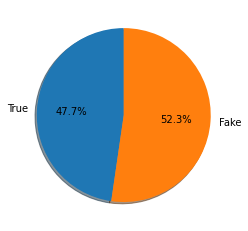

In [5]:
#pie chart pour voir si le data set est bien reparti
fig1, ax1 = plt.subplots()
ax1.pie([true_data.shape[0], fake_data.shape[0]], labels=('True', 'Fake'), autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

In [6]:
df.shape

(44898, 6)

In [7]:
df.drop_duplicates(subset=["text"], inplace=True)
#df[df.duplicated() == True]
df.shape

(38646, 6)

In [8]:
df.isnull().sum()

title       0
text        0
subject     0
date        0
label       0
combined    0
dtype: int64

In [9]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer=process_text)
message_bow = cv.fit_transform(df['combined'])

In [11]:
message_bow.shape

(38646, 289562)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(message_bow, df['label'], test_size = 0.20, random_state = 0)

In [13]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))
print("--------------------------------------------------------------")
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     13965
           1       0.98      0.99      0.99     16951

    accuracy                           0.99     30916
   macro avg       0.99      0.99      0.99     30916
weighted avg       0.99      0.99      0.99     30916

--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3490
           1       0.98      0.99      0.98      4240

    accuracy                           0.98      7730
   macro avg       0.98      0.98      0.98      7730
weighted avg       0.98      0.98      0.98      7730



In [15]:
confusion_matrix(y_test,pred, labels=[0,1])

array([[3392,   98],
       [  39, 4201]])

In [23]:
mb2 = cv.transform(["Life on moon is real | Of animals, he classified nine species of mammalia, and five of ovipara. Among the former is a small kind of rein-deer, the elk, the moose, the horned bear, and the biped beaver. The last resembles the beaver of the earth in every other respect than in its destitution of a tail, and its invariable habit of walking upon only two feet. It carries its young in its arms like a human being, and moves with an easy gliding motion."])

In [25]:
classifier.predict(mb2)

array([0])

In [26]:
mb2 = cv.transform(["'War is madness,' says Pope Francis, calling for peace in Ukraine | Speaking on Sunday during the Angelus address from his window on St. Peter’s Square, Francis said that the Vatican is willing to do 'everything' it can for peace in Ukraine. Francis said he has sent two cardinals to Ukraine to assist humanitarian efforts, 'not only as a sign of the presence of the Pope,' Francis said, 'but of all people who want to say ‘war is madness, please stop, look at this cruelty!' The Pope called for a 'return to respecting international law' and urged that evacuation corridors be opened so civilians can escape the conflict. 'In Ukraine a river of blood and tears is flowing,' the Pope said. 'It is not just a military operation but a war which creates death and destruction!' Francis also thanked journalists who 'risked their lives' to report on the war. 'Thank you brothers and sisters,' he said to journalists, 'for this service which allows us to be near the drama of the people and to see the cruelty of war.'"])

In [27]:
classifier.predict(mb2)

array([1])